In [1]:
import numpy as np 
import pickle
import sqlite3

In [2]:
model_version=1520689

with open('Training/Data/y_test_new_reshuffeled_'+str(model_version)+'.pickle', 'rb') as handle:
    y_test=pickle.load(handle)
with open('Training/Data/x_test_new_reshuffeled_'+str(model_version)+'.pickle', 'rb') as handle:
    x_test=pickle.load(handle)
    
with open('Training/Data/y_train_new_reshuffeled_'+str(model_version)+'.pickle', 'rb') as handle:
    y_train=pickle.load(handle)
with open('Training/Data/x_train_new_reshuffeled_'+str(model_version)+'.pickle', 'rb') as handle:
    x_train=pickle.load(handle)
    
with open('Training/Data/y_validate_new_reshuffeled_'+str(model_version)+'.pickle', 'rb') as handle:
    y_validate=pickle.load(handle)
with open('Training/Data/x_validate_new_reshuffeled_'+str(model_version)+'.pickle', 'rb') as handle:
    x_validate=pickle.load(handle)

In [3]:

n_x=np.concatenate((x_train,x_validate,x_test))
n_y=np.concatenate((y_train,y_validate,y_test))



zipped_lists = zip(n_x, n_y)
sorted_zipped_lists = sorted(zipped_lists)
n_x=[]
n_y=[]
sorted_list1 = [(n_x.append(aa), n_y.append(bb)) for aa, bb in sorted_zipped_lists]

n_x=np.array(n_x)
n_y=np.array(n_y)

db_name = 'Source/dblp.db'
conn = sqlite3.connect(db_name) 

def dict_factory(cursor, row):
    d = {}
    for idx, col in enumerate(cursor.description):
        d[col[0]] = row[idx]
    return d


conn.row_factory = dict_factory
query = "SELECT * FROM reference WHERE combination_id in "+str(tuple(n_x))
cursor = conn.cursor()
cursor.execute(query)
records= cursor.fetchall()
cursor.close()
if (conn):
    conn.close()

ref_ref=[]
for record in records:
    ref_ref.append(tuple(record.values())[1])

In [4]:
len(records)

174764

In [5]:
records[75]

{'combination_id': 73760,
 'reference_id': 7824,
 'target_author': 'Yinglong Wang',
 'author_fname': 'Yinglong',
 'author_lname': 'Wang',
 'coauthor_fname': 'Zhaoyou',
 'coauthor_lname': 'Zhu',
 'title': 'Separating an azeotropic mixture of toluene and ethanol via heat integration pressure swing distillation.',
 'year': '2015',
 'abbr_journal': 'Comput. Chem. Eng.',
 'journal': ''}

In [ ]:
a,b=np.unique(ref_ref,return_counts=True)
c=np.where(b>1)[0]
a=a[c]

d0=0   #two authors
r0=[]  # references with two authors having the same initials and same fnames
d1=0   #three authors
r1=[]  # references with three authors having the same initials and same fnames
for aa in a:
    x=np.where(ref_ref==aa)[0]
    x2=n_y[x]
    x3=np.unique(x2)
    if len(x3)>1:
        r0.append(aa)
        d0+=1
    if len(x3)>2:
        r1.append(aa)
        d1+=1   
print ("Number of papers containing at least two authors with same initial and sme last name = "+str(d0-d1))
print ("Number of papers containing at least three authors with same initial and sme last name = "+str(d1))

In [ ]:
a,b=np.unique(ref_ref,return_counts=True)
print ("Number ofunique records = "+str(len(a)))

In [7]:
co_authors= []
target_authors=[]
ref=[]
idx_co_authors=[]
idx_target_authors=[]
is_author=[]
for record in records:
    tmp=tuple(record.values())
    ref.append(tmp[1])
    co_author= tmp[5]+'-'+tmp[6]
    author= tmp[3]+'-'+tmp[4]
    tmp2=1 if author==co_author else 0
    is_author.append(tmp2)
    if author not in target_authors:
        target_authors.append(author)
    if co_author not in co_authors:
        co_authors.append(co_author)
        
        
    idx=co_authors.index(co_author)
    idx_co_authors.append(idx) 
    
    idx=target_authors.index(author)
    idx_target_authors.append(idx) 
    
u_idx_co_authors=np.unique(idx_co_authors)
u_idx_target_authors=np.unique(idx_target_authors)


print ("Number of unique co_author names = "+str(len(u_idx_co_authors)))
print ("Number of unique author names = "+str(len(u_idx_target_authors)))


Number of unique co_author names = 33461
Number of unique author names = 2034


In [8]:

print ("Number of unique  target authors = "+str(len(np.unique(n_y))))

Number of unique  target authors = 2260


In [9]:
idx_co_authors=np.array(idx_co_authors)
ref=np.array(ref)
is_author=np.array(is_author)

In [10]:
n_of_papers=[]
n_of_targets=[]
n_of_is_author=[]
for idx in u_idx_co_authors:
    
    tmp=np.where(idx_co_authors==idx)[0]
    
    tmp2=1 if sum(is_author[tmp])==0 else 0
    n_of_is_author.append(tmp2)
    
    
    tmp2=ref[tmp]
    tmp3=np.unique(tmp2)
    n_of_papers.append(len(tmp3))
    
    tmp2=n_y[tmp]
    tmp3=np.unique(tmp2)
    n_of_targets.append(len(tmp3))

In [11]:
# n_of_is_author how many times the co_author is the same as author 
# n_of_papers how many different papers the authors show in 
# n_of_targets how many target authors he co-authored 

In [12]:
idx=8
print (n_of_papers[idx])
print (n_of_targets[idx])

3
1


In [13]:
x=np.array(n_of_is_author)*np.array(n_of_targets)

In [14]:
tmp,tmp2=np.unique(x, return_counts=True)
tmp2=np.flip(tmp2)
tmp=np.flip(tmp)

In [15]:
import matplotlib.pyplot as plt


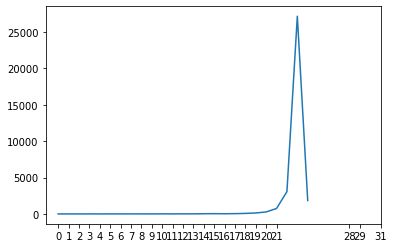

In [16]:
# x(tmp) number of co_authors co-authoring y(tmp2) main authors

plt.plot(tmp2)
plt.xticks(tmp)
plt.show()

In [17]:
# number of authors having the same name 

In [18]:
authors=[]
idx_authors=[]
ref=[]

for record in records:
    tmp=tuple(record.values())
    author= tmp[3]+'-'+tmp[4]
    if author not in authors:
        authors.append(author)
    if int(tmp[1]) not in ref:
        ref.append(int(tmp[1]))
        idx=authors.index(author)
        idx_authors.append(idx)

In [19]:
idx_authors

[0,
 1,
 2,
 3,
 4,
 4,
 3,
 1,
 1,
 5,
 6,
 7,
 4,
 8,
 9,
 10,
 11,
 1,
 12,
 13,
 14,
 15,
 16,
 10,
 16,
 5,
 16,
 17,
 17,
 17,
 17,
 17,
 18,
 19,
 4,
 20,
 20,
 21,
 4,
 20,
 22,
 23,
 24,
 25,
 20,
 23,
 26,
 0,
 0,
 20,
 20,
 27,
 28,
 29,
 27,
 27,
 6,
 27,
 27,
 27,
 5,
 30,
 31,
 29,
 32,
 33,
 34,
 22,
 32,
 35,
 35,
 35,
 36,
 16,
 16,
 37,
 6,
 4,
 39,
 0,
 40,
 39,
 41,
 0,
 16,
 39,
 39,
 42,
 39,
 39,
 39,
 39,
 39,
 13,
 42,
 39,
 13,
 43,
 44,
 0,
 39,
 46,
 47,
 5,
 48,
 49,
 50,
 51,
 52,
 52,
 4,
 5,
 6,
 50,
 53,
 50,
 5,
 50,
 54,
 55,
 50,
 4,
 56,
 57,
 58,
 57,
 59,
 50,
 50,
 50,
 4,
 50,
 50,
 60,
 41,
 50,
 50,
 61,
 6,
 54,
 50,
 56,
 62,
 63,
 61,
 64,
 65,
 66,
 50,
 67,
 50,
 50,
 68,
 50,
 50,
 50,
 50,
 69,
 50,
 4,
 70,
 30,
 65,
 71,
 72,
 55,
 73,
 73,
 74,
 75,
 76,
 77,
 50,
 59,
 78,
 41,
 79,
 4,
 80,
 50,
 56,
 57,
 57,
 50,
 75,
 5,
 50,
 57,
 73,
 50,
 4,
 81,
 82,
 82,
 4,
 56,
 41,
 83,
 61,
 1,
 6,
 84,
 13,
 50,
 85,
 50,
 50,
 50,
 55

In [20]:
tmp,tmp2=np.unique(idx_authors, return_counts=True)
#tmp2=np.flip(tmp2)
#tmp=np.flip(tmp)

In [21]:
tmp3=np.sort(tmp2)
tmp3=np.flip(tmp3)

In [22]:
len(np.where(tmp3>=500)[0])

6

In [23]:
tmp3

array([1127, 1013,  753, ...,    1,    1,    1])

In [24]:


val=[800,500,350,200,100,50,20,5,1]
stat=[]
for i in range(len(val)):
    v=val[i]
    t=sum(stat)
    t2=len(np.where(tmp3>=v)[0])
    stat.append(t2-t)

In [25]:
# number of records / author name 
stat

[2, 4, 3, 9, 17, 54, 168, 482, 1279]

In [26]:
len(records)

85771

In [27]:
len(authors)

2034

In [28]:
#number
len(np.unique(idx_authors))

2018

In [29]:
print ('Number of papers authored by more than one author with the same name = '+str(len(authors)-len(np.unique(idx_authors))))

Number of papers authored by more than one author with the same name = 16


In [30]:
authors=[]
idx_authors=[]
ref=[]

for record in records:
    tmp=tuple(record.values())
    author= tmp[3]+'-'+tmp[4]
    if author not in authors:
        authors.append(author)
    if tmp[2] not in ref:
        ref.append(tmp[2])
        idx=authors.index(author)
        idx_authors.append(idx)
        
tmp,tmp2=np.unique(idx_authors, return_counts=True)
tmp3=np.sort(tmp2)
tmp3=np.flip(tmp3)

val=[80,50,20,10,5,2,1]
stat=[]
for i in range(len(val)):
    v=val[i]
    t=sum(stat)
    t2=len(np.where(tmp3>=v)[0])
    stat.append(t2-t)
# number of authors / author name 
stat

[0, 0, 4, 5, 5, 13, 2007]